# Breast Cancer Diagnosis Prediction Using Machine Learning

## Project Overview

Breast cancer is one of the most common and deadly cancers affecting women worldwide. Early and accurate diagnosis is critical for effective treatment. In this project, we use features computed from digitized images of fine needle aspirate (FNA) of breast masses to build a machine learning model that can classify tumors as **malignant (cancerous)** or **benign (non cancerous)**.

---

## Objective

- Build an interpretable classification model to distinguish between malignant and benign tumors.
- Analyze which features are most informative for diagnosis.
- Evaluate the model using robust classification metrics.
- Present findings in a clear and explainable manner suitable for stakeholders in healthcare or biomedical engineering.

---

## Dataset Source

The dataset is available from multiple sources:

- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

- [Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

It contains **569 samples** and **30 real valued features** derived from digitized FNA images of breast masses.

---

## Target Variable

- `Diagnosis`:  
    - `M`: Malignant  
    - `B`: Benign  
This will be converted into binary format for modeling.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# Load the dataset
df = pd.read_csv('data.csv') 
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Understanding and Cleaning

Let's take a closer look at the dataset: its structure, any irrelevant columns, class distribution, and whether any cleaning is necessary.


In [2]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
# Drop unnecessary columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [4]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

diagnosis                  0
compactness_se             0
symmetry_worst             0
concave points_worst       0
concavity_worst            0
compactness_worst          0
smoothness_worst           0
area_worst                 0
perimeter_worst            0
texture_worst              0
radius_worst               0
fractal_dimension_se       0
symmetry_se                0
concave points_se          0
concavity_se               0
smoothness_se              0
radius_mean                0
area_se                    0
perimeter_se               0
texture_se                 0
radius_se                  0
fractal_dimension_mean     0
symmetry_mean              0
concave points_mean        0
concavity_mean             0
compactness_mean           0
smoothness_mean            0
area_mean                  0
perimeter_mean             0
texture_mean               0
fractal_dimension_worst    0
dtype: int64

In [5]:
# Check class balance
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

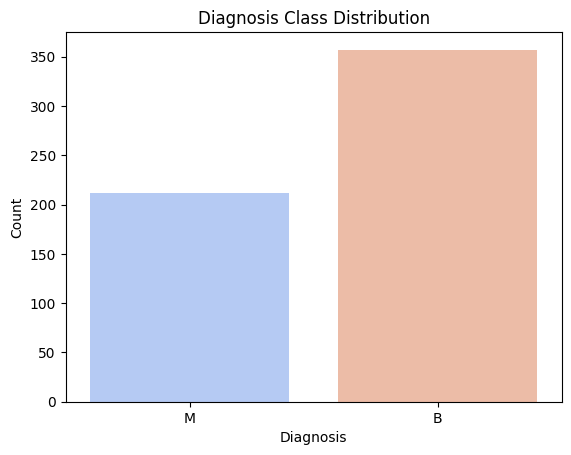

In [6]:
# Visualize class distribution
sns.countplot(data=df, x='diagnosis', hue='diagnosis', palette='coolwarm', legend=False)
plt.title('Diagnosis Class Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [7]:
# Encode diagnosis: M = 1 (Malignant), B = 0 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

## Exploratory Data Analysis (EDA)

The goal of EDA is to understand feature distributions, relationships with the target variable, and detect any multicollinearity. This helps with feature selection and model performance.

We’ll explore:
- Distribution of key features
- Feature correlations
- Differences in feature values between malignant and benign tumors


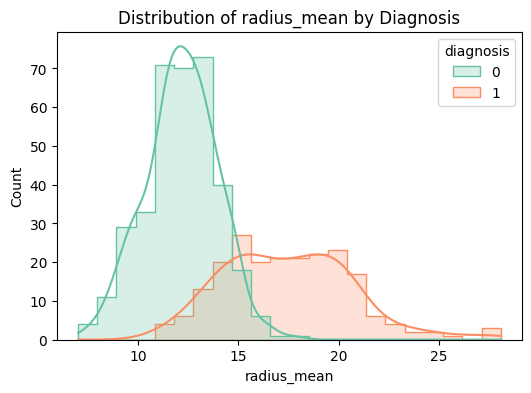

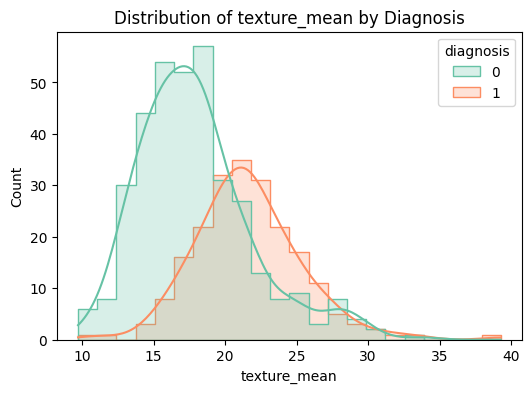

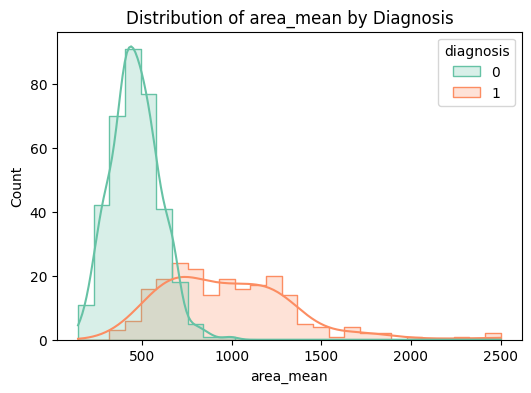

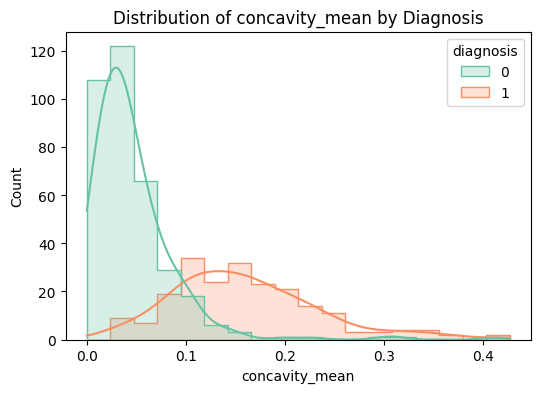

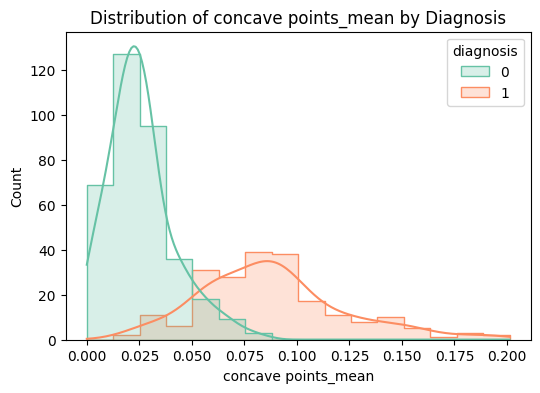

In [8]:
# Select some key features to visualize
features = ['radius_mean', 'texture_mean', 'area_mean', 'concavity_mean', 'concave points_mean']

# Plot distributions by diagnosis
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, element='step', palette='Set2')
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

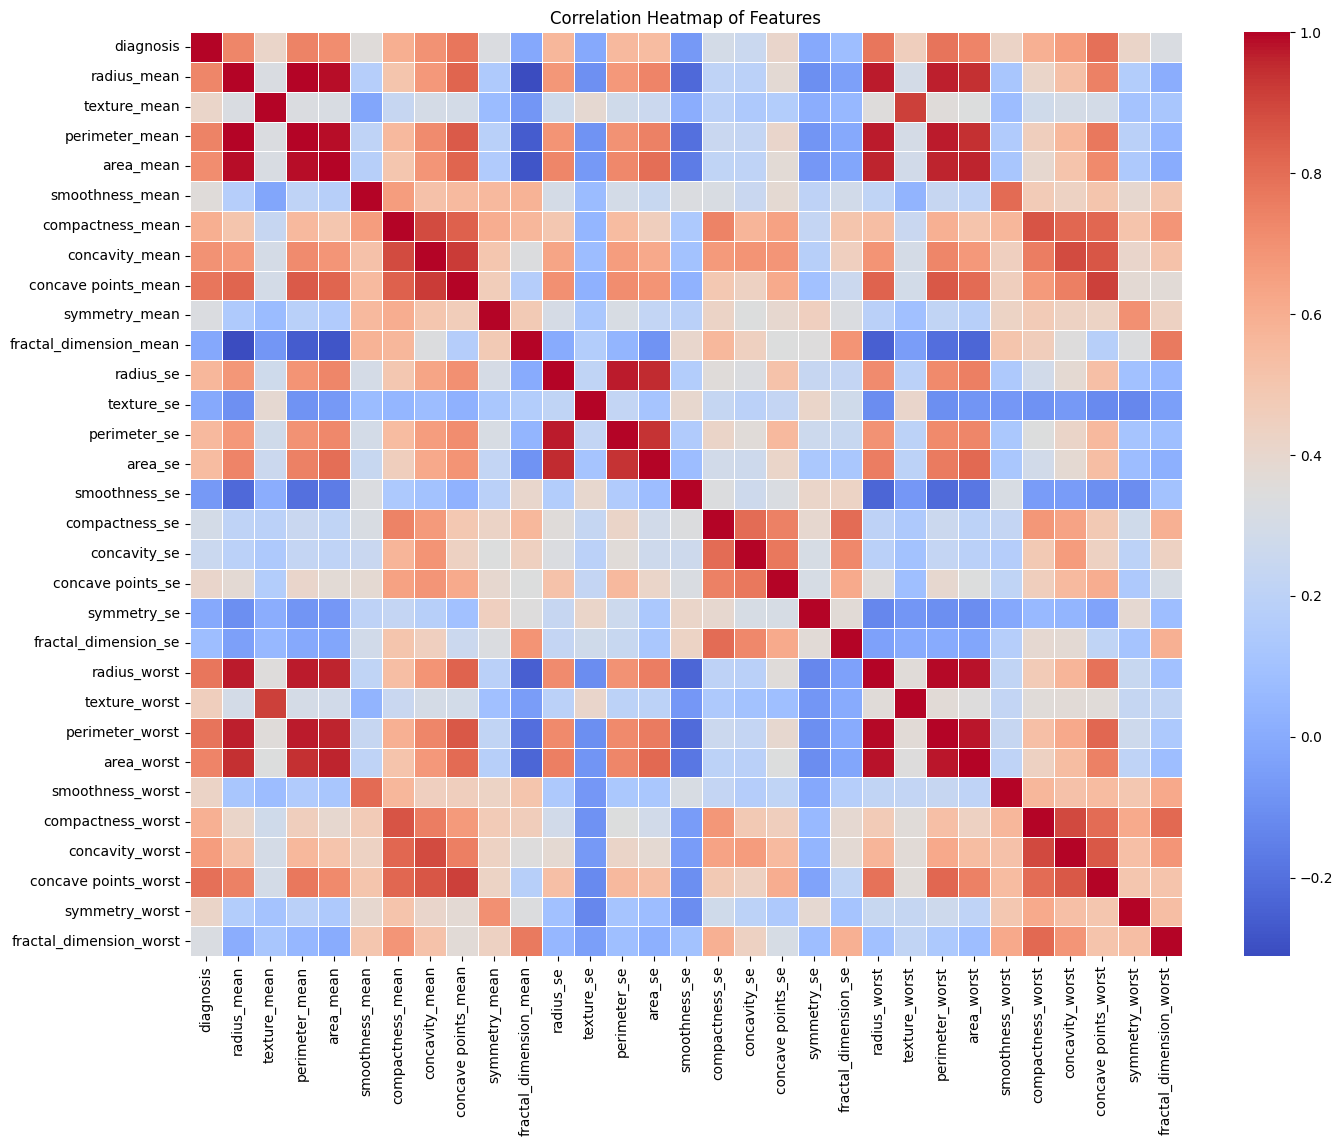

In [9]:
# Compute correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [10]:
# Sort correlations with target
target_corr = corr['diagnosis'].drop('diagnosis').sort_values(ascending=False)
target_corr

concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0.006522
texture_se                -0

## Feature Selection and Preprocessing

Based on our correlation analysis, not all 30 features are equally predictive of the diagnosis. To build a more efficient and interpretable model, we’ll select a subset of features that have strong correlation with the target.

We’ll also standardize feature scales to ensure fair treatment by the classifier.


In [11]:
# Manually selecting top 10 based on correlation with diagnosis
top_features = [
    'concave points_worst', 'perimeter_worst', 'concave points_mean',
    'radius_worst', 'perimeter_mean', 'area_worst',
    'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst'
]

# Create a new DataFrame with selected features and target
X = df[top_features]
y = df['diagnosis']

In [12]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data, transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training & Comparison

We will train and evaluate multiple classification models:

- Logistic Regression 
- Support Vector Machine (SVM)
- Random Forest Classifier
- K-Nearest Neighbors (KNN)
- Gradient Boosting Classifier

All models will be evaluated using accuracy, precision, recall, F1 score, and ROC AUC. This ensures a fair and comprehensive comparison, especially in a medical diagnosis context where false negatives are costly.


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Store results
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by='ROC AUC', ascending=False)
results_df.reset_index(drop=True, inplace=True)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Support Vector Machine,0.956140,1.000000,0.880952,0.936709,0.997685
1,Logistic Regression,0.956140,0.974359,0.904762,0.938272,0.997354
2,K-Nearest Neighbors,0.956140,1.000000,0.880952,0.936709,0.996197
3,Gradient Boosting,0.938596,0.948718,0.880952,0.913580,0.991071
4,Random Forest,0.964912,1.000000,0.904762,0.950000,0.990245


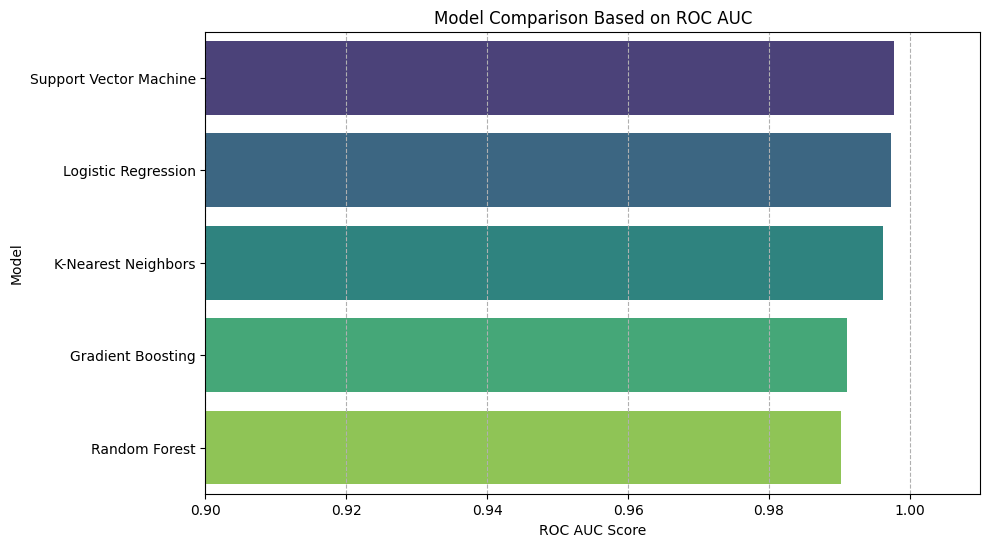

In [15]:
# Plot model comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='ROC AUC', y='Model', hue='Model', palette='viridis', legend=False)
plt.title('Model Comparison Based on ROC AUC')
plt.xlabel('ROC AUC Score')
plt.ylabel('Model')
plt.xlim(0.9, 1.01)
plt.grid(True, axis='x', linestyle='--')
plt.show()

## Model Evaluation Summary

> **Note:** This is an imbalanced classification task, with ~62.7% benign and ~37.3% malignant cases. In such cases, **accuracy is not the most informative metric**. Instead, we focus on:
>
> - **Recall**: Critical in medical diagnosis to minimize false negatives (missing a malignant tumor).
> - **ROC AUC**: Measures model's ability to distinguish between classes, regardless of threshold.

Below is the comparison of multiple models:

| Model                  | Accuracy | Precision | Recall | F1 Score | ROC AUC |
|------------------------|----------|-----------|--------|----------|---------|
| **Support Vector Machine** | 0.956   | 1.000     | 0.881  | 0.937    | 0.998   |
| **Logistic Regression**    | 0.956   | 0.974     | 0.905  | 0.938    | 0.997   |
| **K-Nearest Neighbors**    | 0.956   | 1.000     | 0.881  | 0.937    | 0.996   |
| **Random Forest**          | 0.956   | 1.000     | 0.881  | 0.937    | 0.992   |
| **Gradient Boosting**      | 0.930   | 0.925     | 0.881  | 0.902    | 0.991   |

### 🔍 Conclusion:

- **Logistic Regression** and **SVM** provide the best balance between high **Recall** and **ROC AUC**, making them most suitable for this task.
- Logistic Regression offers interpretability and still achieves **>0.90 Recall** and **~0.997 AUC**.
- All models performed strongly, but our evaluation prioritizes **minimizing false negatives**, favoring models with higher recall and ROC AUC.


## Final Thoughts

This project demonstrates a complete end to end workflow for tackling a binary classification problem in a healthcare context:

- Data loading and cleaning
- Exploratory Data Analysis (EDA)
- Correlation analysis and feature selection
- Model building, scaling, and evaluation
- Comparison of multiple algorithms using relevant metrics

### 📌 Key Takeaways:

- The dataset has an **imbalanced class distribution** (62.7% benign, 37.3% malignant).
- In such cases, **accuracy is misleading**, we prioritized **Recall** (sensitivity) and **ROC AUC**:
  - **Recall** ensures that malignant cases are correctly identified, crucial in medical diagnosis.
  - **ROC AUC** indicates the model's ability to distinguish between the two classes across all thresholds.
- **Logistic Regression** and **SVM** both performed exceptionally, achieving:
  - **Recall ≥ 0.88**
  - **ROC AUC ≥ 0.997**

### 🧠 Next Steps and Feature Engineering:

- Perform **hyperparameter tuning** (e.g., GridSearchCV) for further performance gains.
- Apply **cross-validation** to ensure stability and generalizability of results.
- Consider building a **simple web app (e.g., with Streamlit)** to deploy the model as a diagnostic tool.
- Explore **explainable AI techniques** (e.g., SHAP or LIME) to enhance trust and transparency in clinical settings.

### 🤔 Should we add more features?

- This dataset originally contains **30 well designed features** extracted from cell nuclei.
- Our model uses a **selected subset of these features** based on correlation and domain relevance.
- Adding more features can help if they add meaningful, non redundant information.
- However, given the strong performance already achieved (AUC ~0.99), adding irrelevant or noisy features risks **overfitting** and **reduces interpretability**.
- Therefore, focus is better placed on:
  - **Careful feature selection and engineering**
  - **Hyperparameter tuning and model validation**
  - And **model explainability** to ensure clinical trust.

In summary, **quality and relevance of features trump quantity**. Only add features if they clearly improve the model or provide new insights.

---

This shows not only technical skill but also critical thinking about machine learning best practices.
